In [15]:
#!pip install qiskit ipywidgets

In [16]:
import sys
from qiskit import *
from numpy import *
from qiskit.quantum_info import *
from qiskit.visualization import *

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit """
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

# Let's see how it looks:
qubits=3
qc = QuantumCircuit(qubits)
qft_rotations(qc,qubits)
qc.draw()

┌───┐
q_0: ──────■──────────────────────■───────┤ H ├
           │                ┌───┐ │P(π/2) └───┘
q_1: ──────┼────────■───────┤ H ├─■────────────
     ┌───┐ │P(π/4)  │P(π/2) └───┘              
q_2: ┤ H ├─■────────■──────────────────────────
     └───┘

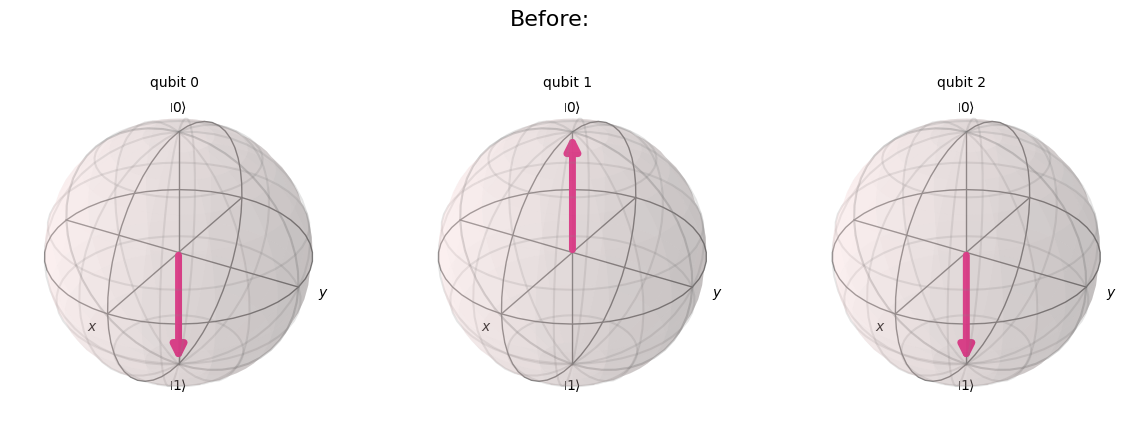

In [17]:
# QFT

def qft(circuit, n):

    qft_rotations(circuit, n)

    for qubit in range(n//2):
      circuit.swap(qubit, n-qubit-1)
    return circuit


nbits = qubits # number of qubits
N = 2**nbits

qc = QuantumCircuit(nbits)
# We will try encoding 5 i.e, |101>

if nbits == 1:
    qc.x(0)

if nbits == 3:
    qc.x(0)
    qc.x(2)

sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector, title= "Before:")

Statevector([ 3.53553391e-01+0.j        , -2.50000000e-01-0.25j      ,
              2.16489014e-17+0.35355339j,  2.50000000e-01-0.25j      ,
             -3.53553391e-01+0.j        ,  2.50000000e-01+0.25j      ,
             -2.16489014e-17-0.35355339j, -2.50000000e-01+0.25j      ],
            dims=(2, 2, 2))


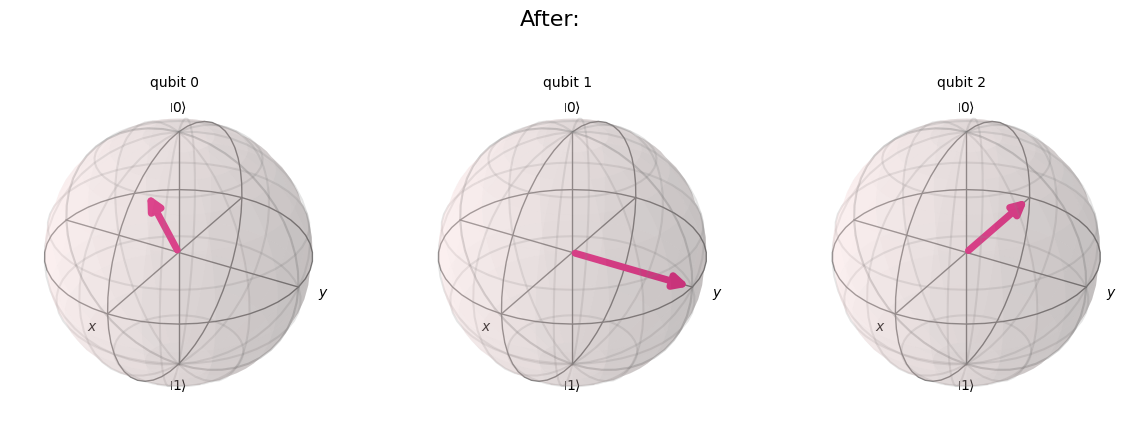

In [18]:
qft(qc,nbits)
statevector = Statevector.from_instruction(qc)
plot_bloch_multivector(statevector, title= "After:")

In [19]:
statevector.draw('latex')

<IPython.core.display.Latex object>